# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [76]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt

In [77]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [78]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [79]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [80]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return y

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [81]:
def create_model():
  model=Sequential()
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  return model




In [82]:
def train_model(model):
  callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
  model_info=model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20,callbacks=[callback],verbose=2)
  train_accuracy=model_info.history['accuracy']
  train_loss=model_info.history['loss']
  val_loss=model_info.history['val_loss']
  test_accuracy = model_info.history['val_accuracy']
  return [train_accuracy,train_loss,test_accuracy,val_loss]

In [83]:
def plot_graph(xpoints,y1points,y2points,x_axis,y_axis,graph_title,label1,label2):
  plt.plot(xpoints, y1points,label=label1)
  plt.plot(xpoints, y2points,label=label2)
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.legend()
  plt.title(graph_title)
  plt.show()

In [84]:
my_model=create_model()
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

In [85]:
result_list=train_model(my_model)

Epoch 1/20
1875/1875 - 32s - loss: 0.3644 - accuracy: 0.8951 - val_loss: 0.1046 - val_accuracy: 0.9681 - 32s/epoch - 17ms/step
Epoch 2/20
1875/1875 - 31s - loss: 0.0971 - accuracy: 0.9711 - val_loss: 0.0739 - val_accuracy: 0.9768 - 31s/epoch - 16ms/step
Epoch 3/20
1875/1875 - 30s - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0559 - val_accuracy: 0.9832 - 30s/epoch - 16ms/step
Epoch 4/20
1875/1875 - 30s - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0568 - val_accuracy: 0.9806 - 30s/epoch - 16ms/step
Epoch 5/20
1875/1875 - 30s - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0463 - val_accuracy: 0.9838 - 30s/epoch - 16ms/step
Epoch 6/20
1875/1875 - 31s - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0485 - val_accuracy: 0.9852 - 31s/epoch - 16ms/step
Epoch 7/20
1875/1875 - 33s - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0419 - val_accuracy: 0.9864 - 33s/epoch - 17ms/step
Epoch 8/20
1875/1875 - 34s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0453 - val_accuracy: 0.9850 - 34s/ep

In [86]:
accuracy_train=result_list[0]
loss_arr=result_list[1]
accuracy_test=result_list[2]
loss_val_arr=result_list[3]

In [87]:
print("Train Accuracy:", accuracy_train)
print("Test_Accuracy:", accuracy_test)

Train Accuracy: [0.8951166868209839, 0.9711499810218811, 0.9794999957084656, 0.9833666682243347, 0.9860333204269409, 0.9883333444595337, 0.9894000291824341, 0.9909999966621399, 0.9925500154495239]
Test_Accuracy: [0.9681000113487244, 0.9768000245094299, 0.9832000136375427, 0.9805999994277954, 0.9837999939918518, 0.9851999878883362, 0.9864000082015991, 0.9850000143051147, 0.9857000112533569]


In [94]:
def create_epochs_arr(accuracy_train):
  epochs_arr=[]
  for i in range(len(accuracy_train)):
    epochs_arr.append(i+1)
  return epochs_arr

In [89]:
epochs_arr=create_epochs_arr(accuracy_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

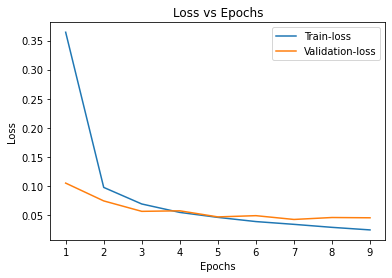

In [91]:
plot_graph(epochs_arr,loss_arr,loss_val_arr,'Epochs','Loss','Loss vs Epochs','Train-loss','Validation-loss')

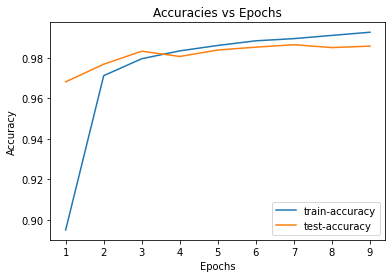

In [92]:
plot_graph(epochs_arr,accuracy_train,accuracy_test,'Epochs','Accuracy','Accuracies vs Epochs','train-accuracy','test-accuracy')

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


Epoch 1/20
1875/1875 - 31s - loss: 1.2943 - accuracy: 0.6942 - val_loss: 0.4980 - val_accuracy: 0.9555 - 31s/epoch - 16ms/step
Epoch 2/20
1875/1875 - 30s - loss: 1.0983 - accuracy: 0.7679 - val_loss: 0.3266 - val_accuracy: 0.9685 - 30s/epoch - 16ms/step
Epoch 3/20
1875/1875 - 31s - loss: 1.0595 - accuracy: 0.7763 - val_loss: 0.3575 - val_accuracy: 0.9760 - 31s/epoch - 16ms/step
Epoch 4/20
1875/1875 - 30s - loss: 1.0372 - accuracy: 0.7806 - val_loss: 0.3489 - val_accuracy: 0.9750 - 30s/epoch - 16ms/step


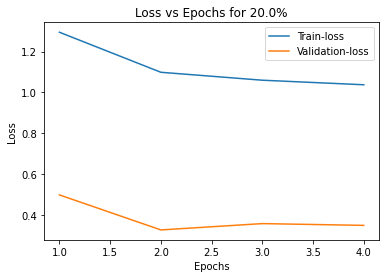

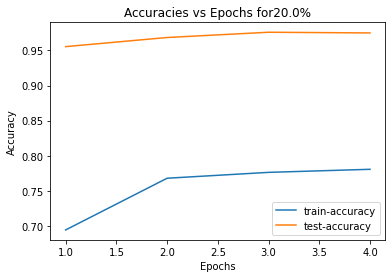

Train Accuracy: [0.6941999793052673, 0.7678833603858948, 0.7762500047683716, 0.7806166410446167]
Test_Accuracy: [0.9555000066757202, 0.968500018119812, 0.9760000109672546, 0.9750000238418579]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                            

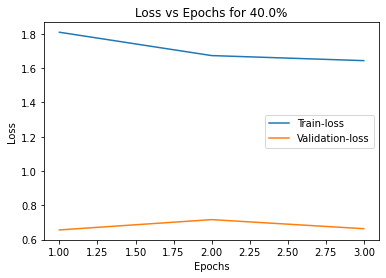

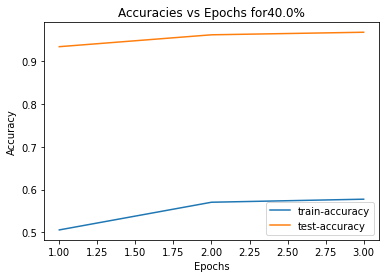

Epoch 1/20
1875/1875 - 31s - loss: 2.1245 - accuracy: 0.3325 - val_loss: 1.2204 - val_accuracy: 0.8726 - 31s/epoch - 17ms/step
Epoch 2/20
1875/1875 - 30s - loss: 2.0665 - accuracy: 0.3712 - val_loss: 1.1399 - val_accuracy: 0.9363 - 30s/epoch - 16ms/step
Epoch 3/20
1875/1875 - 30s - loss: 2.0463 - accuracy: 0.3796 - val_loss: 1.1661 - val_accuracy: 0.9462 - 30s/epoch - 16ms/step
Epoch 4/20
1875/1875 - 30s - loss: 2.0347 - accuracy: 0.3840 - val_loss: 1.1262 - val_accuracy: 0.9535 - 30s/epoch - 16ms/step
Epoch 5/20
1875/1875 - 30s - loss: 2.0262 - accuracy: 0.3856 - val_loss: 1.0221 - val_accuracy: 0.9584 - 30s/epoch - 16ms/step
Epoch 6/20
1875/1875 - 30s - loss: 2.0189 - accuracy: 0.3869 - val_loss: 1.0272 - val_accuracy: 0.9567 - 30s/epoch - 16ms/step
Epoch 7/20
1875/1875 - 30s - loss: 2.0106 - accuracy: 0.3885 - val_loss: 1.0836 - val_accuracy: 0.9588 - 30s/epoch - 16ms/step


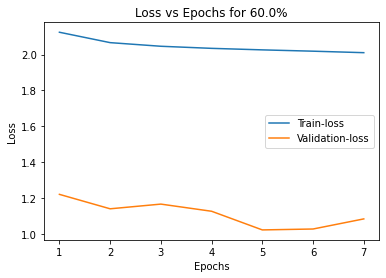

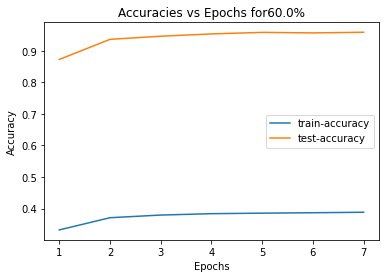

Epoch 1/20
1875/1875 - 31s - loss: 2.2894 - accuracy: 0.1592 - val_loss: 1.9702 - val_accuracy: 0.7949 - 31s/epoch - 17ms/step
Epoch 2/20
1875/1875 - 30s - loss: 2.2772 - accuracy: 0.1812 - val_loss: 1.9356 - val_accuracy: 0.8231 - 30s/epoch - 16ms/step
Epoch 3/20
1875/1875 - 30s - loss: 2.2720 - accuracy: 0.1859 - val_loss: 1.8844 - val_accuracy: 0.8100 - 30s/epoch - 16ms/step
Epoch 4/20
1875/1875 - 31s - loss: 2.2681 - accuracy: 0.1874 - val_loss: 1.7292 - val_accuracy: 0.8500 - 31s/epoch - 16ms/step
Epoch 5/20
1875/1875 - 30s - loss: 2.2648 - accuracy: 0.1902 - val_loss: 1.8159 - val_accuracy: 0.8873 - 30s/epoch - 16ms/step
Epoch 6/20
1875/1875 - 31s - loss: 2.2609 - accuracy: 0.1914 - val_loss: 1.7879 - val_accuracy: 0.8759 - 31s/epoch - 16ms/step


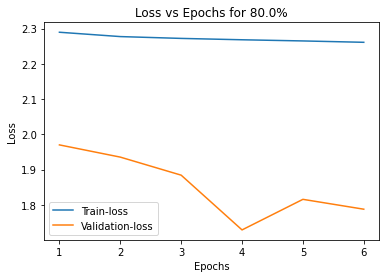

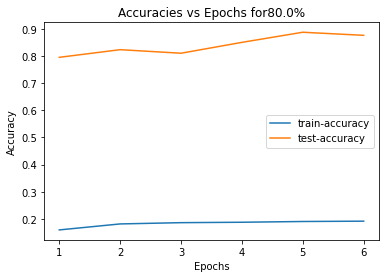

Epoch 1/20
1875/1875 - 31s - loss: 2.2889 - accuracy: 0.1131 - val_loss: 2.7438 - val_accuracy: 0.0011 - 31s/epoch - 17ms/step
Epoch 2/20
1875/1875 - 30s - loss: 2.2734 - accuracy: 0.1125 - val_loss: 2.9356 - val_accuracy: 0.0010 - 30s/epoch - 16ms/step
Epoch 3/20
1875/1875 - 30s - loss: 2.2647 - accuracy: 0.1161 - val_loss: 3.1054 - val_accuracy: 0.0011 - 30s/epoch - 16ms/step


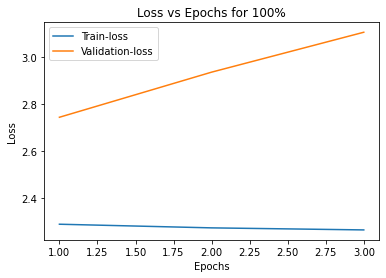

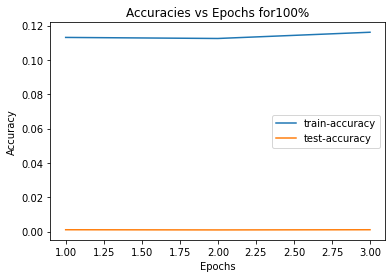

In [95]:
randomise_arr=[0.2,0.4,0.6,0.8,1]
for perc in randomise_arr:
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  counter=0
  while(counter<perc*60000):
    num1 = random.randint(0, 9)
    while(num1==y_train[counter]):
      num1 = random.randint(0, 9)
    y_train[counter]=num1
    counter=counter+1
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  curr_model=create_model()
  ret_list=train_model(curr_model)
  curr_accuracy_train=ret_list[0]
  curr_loss_arr=ret_list[1]
  curr_accuracy_test=ret_list[2]
  curr_loss_val_arr=ret_list[3]
  title_string=str(perc*100)+"%"
  curr_epochs_arr=create_epochs_arr(curr_accuracy_train)
  plot_graph(curr_epochs_arr,curr_loss_arr,curr_loss_val_arr,'Epochs','Loss','Loss vs Epochs for '+title_string,'Train-loss','Validation-loss')
  plot_graph(curr_epochs_arr,curr_accuracy_train,curr_accuracy_test,'Epochs','Accuracy','Accuracies vs Epochs for '+title_string,'train-accuracy','test-accuracy')
  if(perc==0.2):
    print("Train Accuracy:", curr_accuracy_train)
    print("Test_Accuracy:", curr_accuracy_test)
    curr_model.summary()


  
  

